In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assi_df_1=pd.read_excel('assigned_tech.xlsx')

In [3]:
assi_df_1.head()

,Unnamed: 0,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc,Zip_income
0,0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000,23933.540000
1,1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000,68711.216667
2,2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667,110329.465000
3,3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000,32925.410000
4,4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000,83225.340000


In [4]:
assi_df_1=assi_df_1.drop(['Unnamed: 0'],axis=1)

In [5]:
assi_df_1.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc', 'Zip_income'],
      dtype='object')

In [6]:
assi_df=assi_df_1[['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl','Zip_income']]

In [7]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Zip_income
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,68711.216667
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,110329.465000
3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,32925.410000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,83225.340000


In [8]:
assi_df['income_tech']=assi_df['Zip_income']/assi_df['Avg_per_day']

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
assi_df['cacl_income']=assi_df['tech_cancl']*assi_df['income_tech']

In [10]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Zip_income,income_tech,cacl_income
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,23933.540000,191468.320000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,68711.216667,34355.608333,137422.433333
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,110329.465000,36776.488333,73552.976667
3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,32925.410000,32925.410000,32925.410000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,83225.340000,41612.670000,124838.010000


<AxesSubplot:>

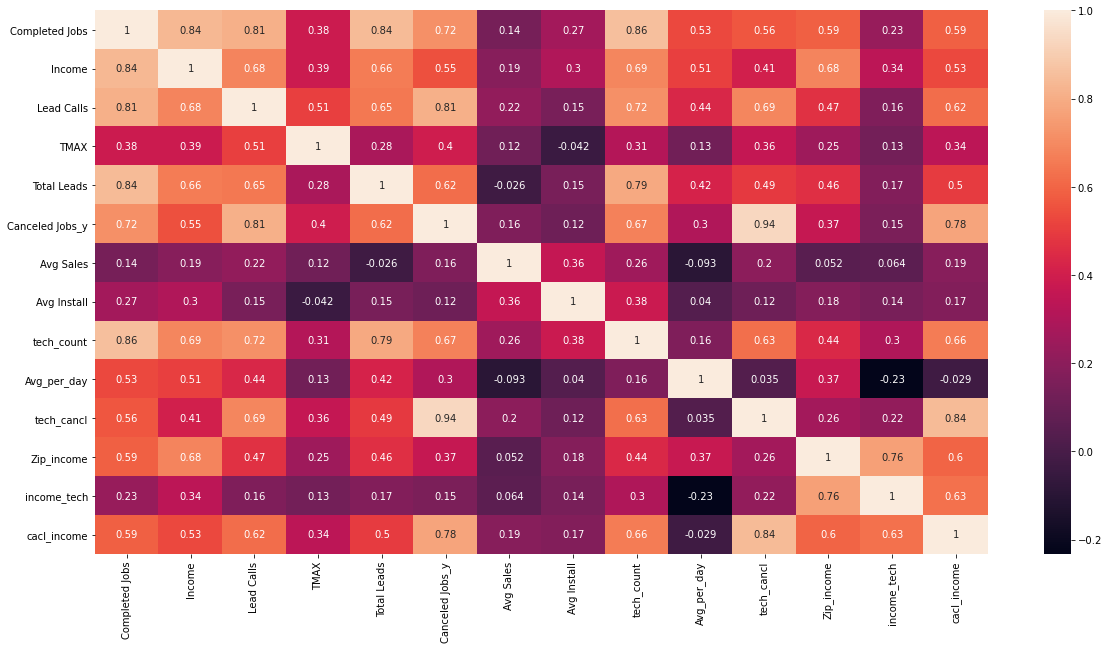

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(assi_df.corr(method='spearman'),annot=True)

In [12]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Zip_income', 'income_tech',
       'cacl_income'],
      dtype='object')

In [13]:
train=assi_df[0:300]
test=assi_df[300:]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [15]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [16]:
X=scaler.fit_transform(X)

In [17]:
y=y.values

In [18]:
y=y.reshape(-1,1)

In [19]:
y=scaler.fit_transform(y)

In [20]:
X[0]

array([-0.71594021, -0.46991441, -1.07091757, -0.89182462, -0.09062214,
        1.71657597,  1.55732019,  0.69683124, -1.80867813,  1.26536219,
       -1.5106707 , -0.80134346,  0.17029812])

In [21]:
y[0]

array([-1.06954897])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [24]:
regressor.score(X_train,y_train)

0.7962944210736893

In [25]:
    regressor.score(X_test,y_test)

0.7120658622443679

In [26]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [27]:
X_=scaler.fit_transform(X_)

In [28]:
y_=y_.values

In [29]:
y_=y_.reshape(-1,1)

In [30]:
y_=scaler.fit_transform(y_)

In [31]:
y_

array([[ 0.9806302 ],
       [-0.89045717],
       [-1.92773717],
       [ 0.81247564],
       [ 1.12105129],
       [ 1.12105129],
       [-0.18016665],
       [ 0.47225574],
       [ 0.05495716],
       [-1.04556461],
       [-1.92414292],
       [ 0.13562961],
       [-0.02986856],
       [ 0.57225519],
       [ 0.38822842],
       [ 0.66374321],
       [ 0.45523242],
       [-0.08982136],
       [-0.27646306],
       [ 1.14017725],
       [ 2.31909415],
       [-0.29238463],
       [ 1.1927997 ],
       [-0.93390686],
       [-1.92948757],
       [ 0.97528819],
       [ 0.32419303],
       [ 0.30674751],
       [-0.18019013],
       [-0.43473319],
       [-0.73176268],
       [-0.84673265],
       [ 0.35488529],
       [ 0.48038258],
       [-0.59644926],
       [ 0.13885557],
       [ 0.13885557],
       [-0.94128465],
       [-1.5536477 ],
       [ 1.15875377],
       [ 0.3061166 ],
       [ 2.30319799],
       [-1.15314289],
       [-0.61138288],
       [ 1.25597342],
       [ 0

In [32]:
regressor.score(X_,y_)

0.637308046710225

In [33]:
y_pred= regressor.predict(X_)

In [34]:
y_pred=scaler.inverse_transform(y_pred)

In [35]:
y_pred

array([119010.55307652,  49618.51014561,  39176.33540649, 105105.27855311,
       114618.05942709, 100035.10898707, 101469.97468825,  92050.47166581,
       100364.92219665,  56816.61876363,  30149.57155599,  85732.00775469,
        92106.61810647,  60535.60869529,  72815.59376995, 111367.92699653,
        94762.85856721,  90728.37939513,  64005.19339269, 100736.4471644 ,
       122726.16672189,  95877.38284704, 122448.91328885,  42200.03600806,
        32340.5004311 , 104280.11196599, 106187.46275672,  89610.18880737,
        88931.59367076,  65152.35396412,  48866.92322716,  78612.37043552,
       102732.53217086,  94246.19036948,  73098.2694294 ,  81203.75697555,
       107917.69953689,  50227.54601249,  50833.22255648, 106233.61574104,
        98671.51560336, 105986.08354296,  50419.72668086,  30659.99192573,
       113591.53897943, 105113.29793251,  82938.75936398,  70654.65915693,
       101836.70242844,  56199.36792386,  33811.525739  ,  80422.5293293 ,
        65349.29459192,  

In [36]:
y_=scaler.inverse_transform(y_)

In [37]:
y_=y_.flatten()

In [38]:
y_.shape

(59,)

In [39]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

In [40]:
comp.head()

,Actual,Predicted
0,121551.86,119010.553077
1,43465.15,49618.510146
2,176.00,39176.335406
3,114534.21,105105.278553
4,127412.10,114618.059427


<AxesSubplot:>

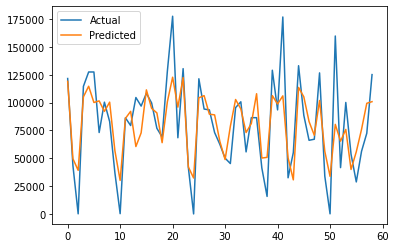

In [41]:
comp.plot()

In [42]:
from sklearn import metrics

In [43]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


RMSE: 25133.444766938563
MAE: 19729.74828686328


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
svr.fit(X, y)

Tuning hyper-parameters


C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(cv=5, estimator=SVR(epsilon=0.01),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}])

In [46]:
print("Grid scores on training set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Grid scores on training set:
-0.423 (+/-1.528) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.474 (+/-0.292) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.567 (+/-0.243) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.436 (+/-0.433) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.342 (+/-0.498) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.101 (+/-0.701) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.027 (+/-0.785) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.183 (+/-1.028) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
0.475 (+/-0.293) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.581 (+/-0.251) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.558 (+/-0.313) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.302 (+/-0.540) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.145 (+/-0.751) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.058 (+/-0.853) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.002 (+/-0.921) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
-0.176 (+/-1.152) for {'C': 10, 'ga

In [47]:
# tuning 

tuned_svm = SVR(C=10000,gamma=0.0001,kernel='rbf')

In [48]:
tuned_svm.fit(X_train,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=10000, gamma=0.0001)

In [49]:
tuned_svm.score(X_train,y_train)

0.7712628499445734

In [50]:
tuned_svm.score(X_test,y_test)

0.8130210996307576

In [51]:
tuned_svm.score(X_,y_)

-3.7324190057372943

In [52]:
y_pred_1=tuned_svm.predict(X_)

In [53]:
y_pred_1=scaler.inverse_transform(y_pred_1)

In [54]:
y_

array([1.2155186e+05, 4.3465150e+04, 1.7600000e+02, 1.1453421e+05,
       1.2741210e+05, 1.2741210e+05, 7.3107940e+04, 1.0033570e+05,
       8.2920440e+04, 3.6992000e+04, 3.2600000e+02, 8.6287170e+04,
       7.9380380e+04, 1.0450901e+05, 9.6828960e+04, 1.0832711e+05,
       9.9625260e+04, 7.6878350e+04, 6.9089170e+04, 1.2821029e+05,
       1.7741042e+05, 6.8424710e+04, 1.3040640e+05, 4.1651850e+04,
       1.0295000e+02, 1.2132892e+05, 9.4156550e+04, 9.3428490e+04,
       7.3106960e+04, 6.2484030e+04, 5.0088000e+04, 4.5289920e+04,
       9.5437440e+04, 1.0067486e+05, 5.5735080e+04, 8.6421800e+04,
       8.6421800e+04, 4.1343950e+04, 1.5788000e+04, 1.2898555e+05,
       9.3402160e+04, 1.7674702e+05, 3.2502400e+04, 5.5111850e+04,
       1.3304285e+05, 8.8538890e+04, 6.6133390e+04, 6.7090810e+04,
       1.2660424e+05, 3.3965630e+04, 1.7940000e+02, 1.5967948e+05,
       4.1631570e+04, 1.0008120e+05, 5.3637350e+04, 2.8791980e+04,
       5.6282450e+04, 7.2449570e+04, 1.2505766e+05])

In [55]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

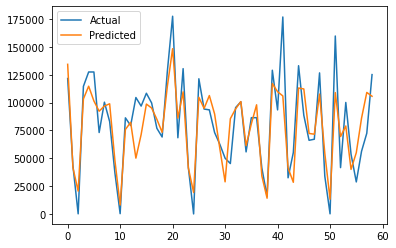

In [56]:
comp_1.plot()

In [57]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))


RMSE: 21364.65479009583
MAE: 16512.544057946034
